In [109]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sn


In [110]:
  ROOT='./kaggle/input/dt23-test/'
  adjusted_close_df = pd.read_csv(ROOT+'series/adjusted_close.csv',index_col=0)
  adjusted_close_df.index = pd.to_datetime(adjusted_close_df.index)

  # close_df = pd.read_csv(ROOT+'series/close.csv', index_col = 0)
  # close_df.index = pd.to_datetime(close_df.index)
  # Uncomment the following line to test the notebook on a reduced number of 
  # products that span the entire makespan
  # adjusted_close_df = adjusted_close_df.dropna(axis=1).iloc[:,:20]

  print(adjusted_close_df.head())


            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
timestamp                                                                  
2023-10-06            53.450000               295.68               28.19   
2023-10-05            53.070000               290.09               27.58   
2023-10-04            53.450000               290.28               27.84   
2023-10-03            53.650000               288.04               27.95   
2023-10-02            53.997474               294.98               28.58   

            adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
timestamp                                                               
2023-10-06               43.70               24.59             187.38   
2023-10-05               42.85               24.24             186.29   
2023-10-04               43.35               24.40             186.73   
2023-10-03               45.75               25.68             188.92   
2023-10-02               45.6

In [111]:

def polynomial_regression(past_prices):
    """
        Fits a 3d degree polynomial for each asset and returns the predicted value
    """
    past_prices.index = pd.to_datetime(past_prices.index)

    models={}

    # Fitting a 3d degree polynomial for each asset
    for c in past_prices.columns:
        x=past_prices[[c]]
        xp = PolynomialFeatures(degree=3).fit_transform(np.arange(len(x)).reshape((len(x),1)))
        model = sm.OLS(x.values, xp).fit()
        models[c] = model

    # Returning the next value of each polynomial
    return pd.DataFrame({k:v.predict(PolynomialFeatures(degree=3).fit_transform(np.array([len(x)]).reshape((1,1)))) for k,v in models.items()})/past_prices.iloc[-1]

poly_df = polynomial_regression(adjusted_close_df)

print(poly_df.head())
  

   adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
0             1.258891                  NaN                 NaN   

   adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
0           -0.580044           -0.645286           2.567975   

   adjusted_close_GILD  adjusted_close_MDT  adjusted_close_V  \
0             4.678267             1.77707               NaN   

   adjusted_close_A  ...  adjusted_close_CI  adjusted_close_BALL  \
0               NaN  ...           1.612484             3.218565   

   adjusted_close_JNJ  adjusted_close_DOV  adjusted_close_CRM  \
0            1.105737            0.907603                 NaN   

   adjusted_close_PGR  adjusted_close_WAT  adjusted_close_BWA  \
0           -0.173424            1.913646            0.901803   

   adjusted_close_BLK  adjusted_close_PPL  
0            0.793439            0.944121  

[1 rows x 303 columns]


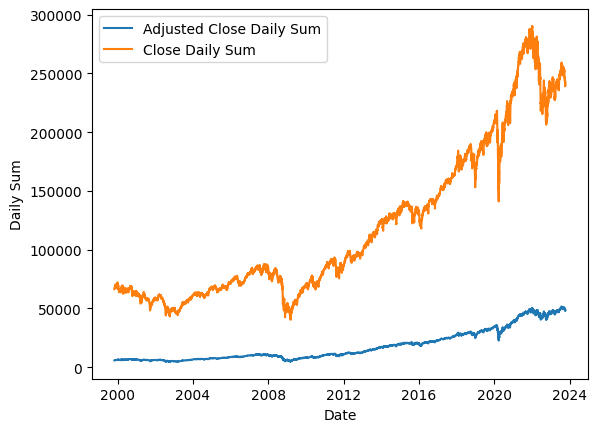

In [112]:
adjusted_close_df['daily_sum'] = adjusted_close_df.sum(axis=1)
close_df['daily_sum'] = close_df.sum(axis=1)

adjusted_close_df.head()


# Assuming you have already calculated 'daily_sum' for both dataframes
# adjusted_close_df and close_df

# Plotting the 'daily_sum' from adjusted_close_df
plt.plot(adjusted_close_df['daily_sum'], label='Adjusted Close Daily Sum')

# Plotting the 'daily_sum' from close_df
plt.plot(close_df['daily_sum'], label='Close Daily Sum')

# Adding labels and a legend
plt.xlabel('Date')
plt.ylabel('Daily Sum')
plt.legend()

# Display the plot
plt.show()


In [113]:

# # Read the market_cap.csv file and set the 'date' column as the index
# market_cap_df = pd.read_csv(ROOT + 'series/additional_data/market_cap.csv')
# market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])  # Convert 'date' to datetime
# market_cap_df.set_index('date', inplace=True)

# # Calculate the 'daily_sum' column
# market_cap_df['daily_sum'] = market_cap_df.sum(axis=1)

# # Sort the DataFrame by 'date' in ascending order
# market_cap_df.sort_index(inplace=True)


# # Align the two DataFrames to only include the common dates
# common_market_cap, common_adjusted_close = market_cap_df.align(adjusted_close_df, join='inner', axis=0)

# # Plotting the 'daily_sum' for common dates
# plt.plot(common_market_cap.index, common_market_cap['daily_sum'], label='Market Cap Daily Sum')
# plt.plot(common_adjusted_close.index, common_adjusted_close['daily_sum'], label='Adjusted Close Daily Sum')

# # Adding labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Daily Sum')
# plt.legend()

# # Display the plot
# plt.show()


/var/folders/wj/gbbtcthx2dl_5rnvb3ks6wvh0000gq/T/ipykernel_4180/2228054820.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_returns_df = adjusted_close_df.pct_change() * 100


            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
2023-10-06                        NaN                        NaN   
2023-10-05                  -0.710945                        NaN   
2023-10-04                   0.716035                -103.464424   
2023-10-03                   0.374181               -1278.175700   
2023-10-02                   0.647668                -412.230816   

            percentage_variation_TPR  
timestamp                             
2023-10-06                       NaN  
2023-10-05                       NaN  
2023-10-04               -143.565663  
2023-10-03                -58.087423  
2023-10-02                470.473248  
            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR
timestamp                                                               
2023-10-06            53.450000               295.68               28.19
2023-10-05            53.070000

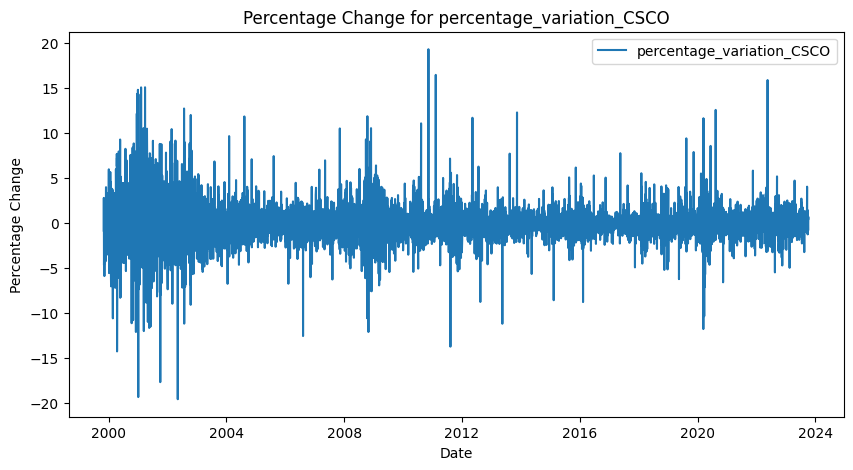

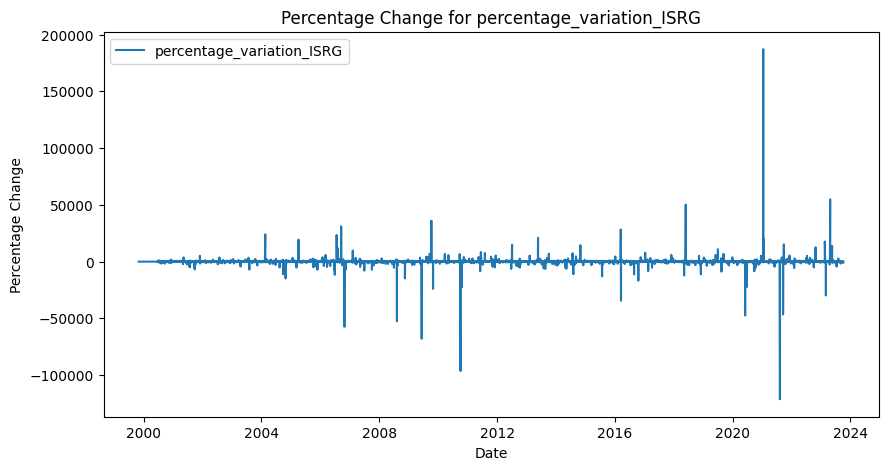

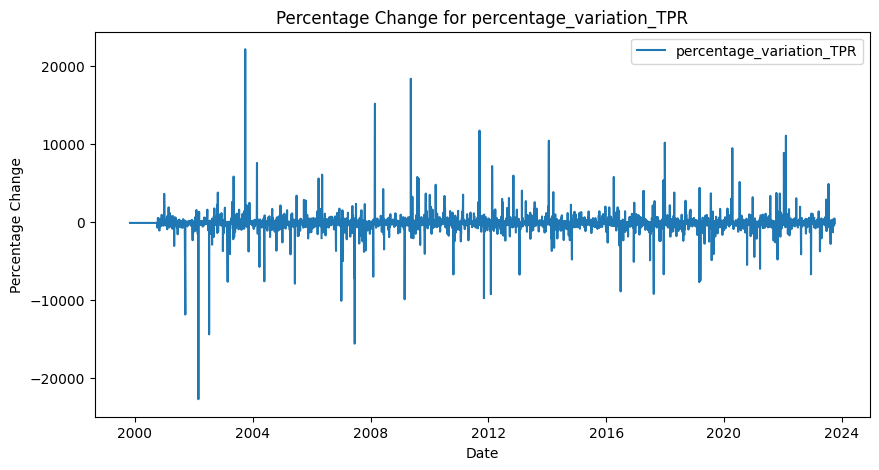

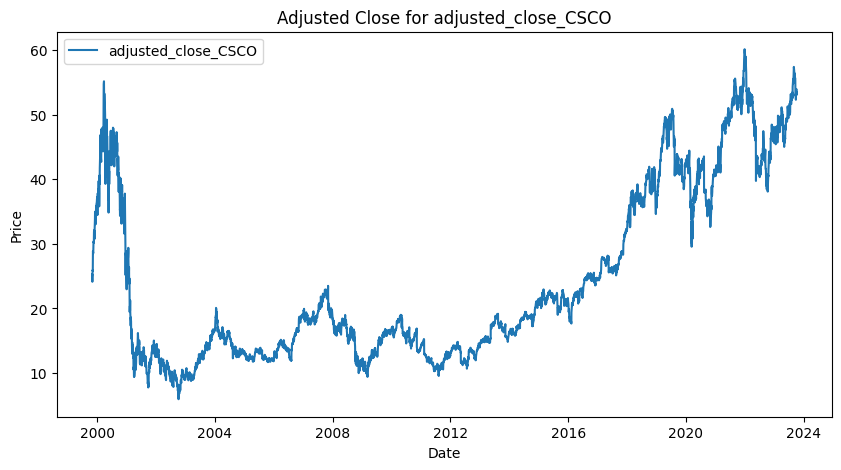

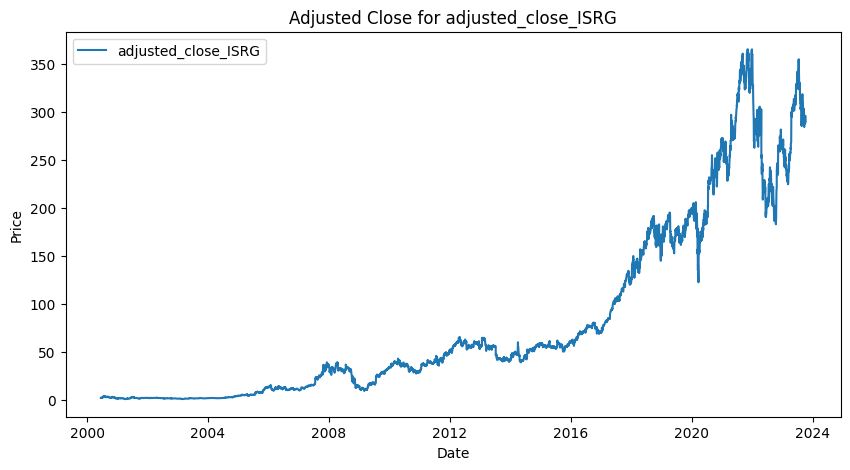

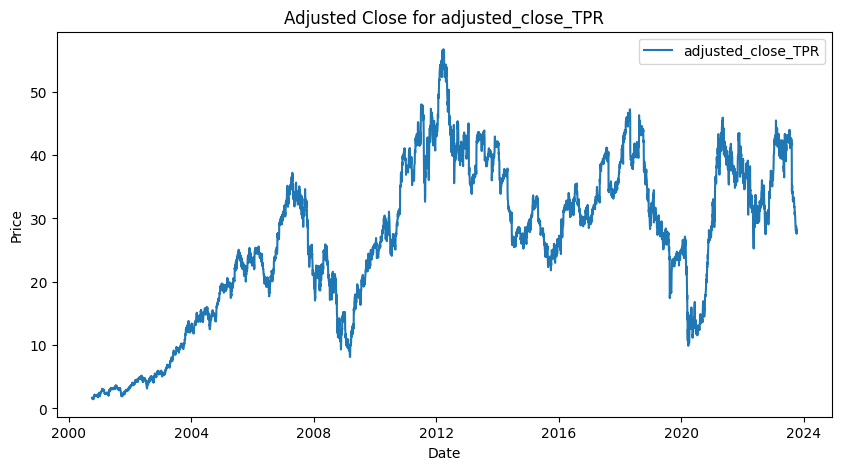

In [114]:
# Calculate percentage change
percentage_returns_df = adjusted_close_df.pct_change() * 100
# Apply a transformation to all columns except the index
percentage_returns_df.iloc[:, 1:] = percentage_returns_df.iloc[:, 1:].apply(lambda col: (col - col.shift(1)) / col.shift(1) * 100)

# Rename columns by replacing 'adjusted_close' with 'percentage_variation'
percentage_returns_df.columns = percentage_returns_df.columns.str.replace('adjusted_close', 'percentage_variation')

# Fill missing values in percentage_returns_df using linear interpolation
percentage_returns_df = percentage_returns_df.interpolate(method='linear')

# Print the first 3 columns of percentage_returns_df
print(percentage_returns_df.iloc[:, :3].head())

# Print the first 3 columns of adjusted_close_df
print(adjusted_close_df.iloc[:, :3].head())

# Create separate plots for the first 3 columns of percentage_returns_df
for col in percentage_returns_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(percentage_returns_df.index, percentage_returns_df[col], label=col)
    plt.title(f'Percentage Change for {col}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()

# Create separate plots for the first 3 columns of adjusted_close_df
for col in adjusted_close_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(adjusted_close_df.index, adjusted_close_df[col], label=col)
    plt.title(f'Adjusted Close for {col}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


            Unnamed: 0  adjusted_close
timestamp                             
2023-10-20           0          421.19
2023-10-19           1          426.43
2023-10-18           2          430.21
2023-10-17           3          436.02
2023-10-16           4          436.04


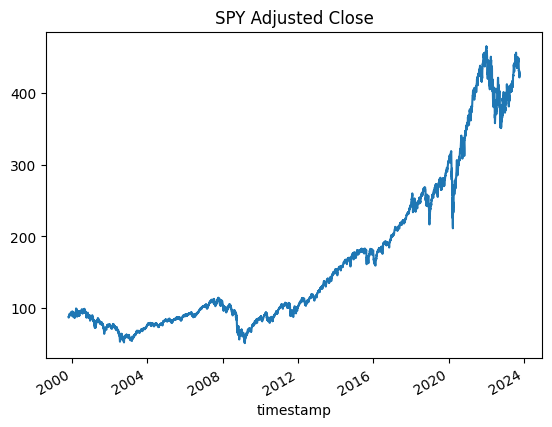

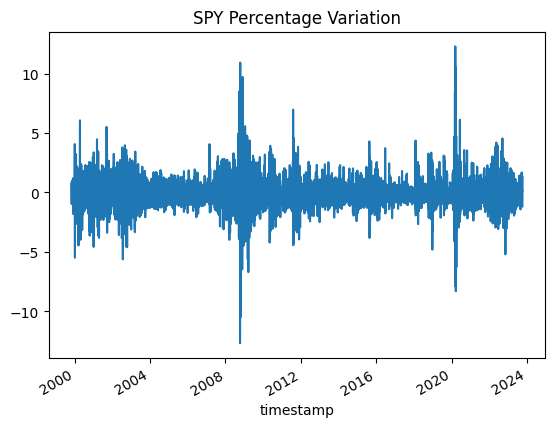

In [115]:
# data for SPY500 stock
spy_df = pd.read_csv(ROOT + '/series/benchmark/SPY.csv')
spy_df['timestamp'] = pd.to_datetime(spy_df['timestamp'])  # Convert 'timestamp' to datetime
spy_df.set_index('timestamp', inplace=True)

# The column names should be in quotes to be recognized as strings
spy_df.drop(['open', 'high', 'low', 'close','volume','dividend','split'], axis=1, inplace=True)
print(spy_df.head())
# Assuming percentage_returns_df is another DataFrame indexed by dates
# Find common dates in spy_df and percentage_returns_df
common_dates = spy_df.index.intersection(percentage_returns_df.index)

# Keep only the rows with common dates
spy_df = spy_df.loc[common_dates]

# Calculate the percentage change for the adjusted_close in spy_df
spy_df['percentage_variation'] = spy_df['adjusted_close'].pct_change() * 100

# Fill missing values in 'percentage_variation' column using linear interpolation
spy_df['percentage_variation'].interpolate(method='linear', inplace=True)

# Plot the adjusted close
spy_df['adjusted_close'].plot(title='SPY Adjusted Close')
plt.show()

# Plot the percentage variation
spy_df['percentage_variation'].plot(title='SPY Percentage Variation')
plt.show()

In [116]:
percentage_returns_df['percentage_variation_SPY500'] = spy_df['percentage_variation']
adjusted_close_df['adjusted_close_SPY500'] = spy_df['adjusted_close']

print(percentage_returns_df.head())
print(adjusted_close_df.head())

            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
2023-10-06                        NaN                        NaN   
2023-10-05                  -0.710945                        NaN   
2023-10-04                   0.716035                -103.464424   
2023-10-03                   0.374181               -1278.175700   
2023-10-02                   0.647668                -412.230816   

            percentage_variation_TPR  percentage_variation_DVN  \
timestamp                                                        
2023-10-06                       NaN                       NaN   
2023-10-05                       NaN                       NaN   
2023-10-04               -143.565663               -159.990391   
2023-10-03                -58.087423                374.463668   
2023-10-02                470.473248               -103.948087   

            percentage_variation_MRO  percentage_variation_B

In [117]:
def corr_heatmap(df):
    graph_size = (12, 12)
    fig, ax = plt.subplots(figsize=graph_size)
    sn.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, cmap='coolwarm')
    plt.show()

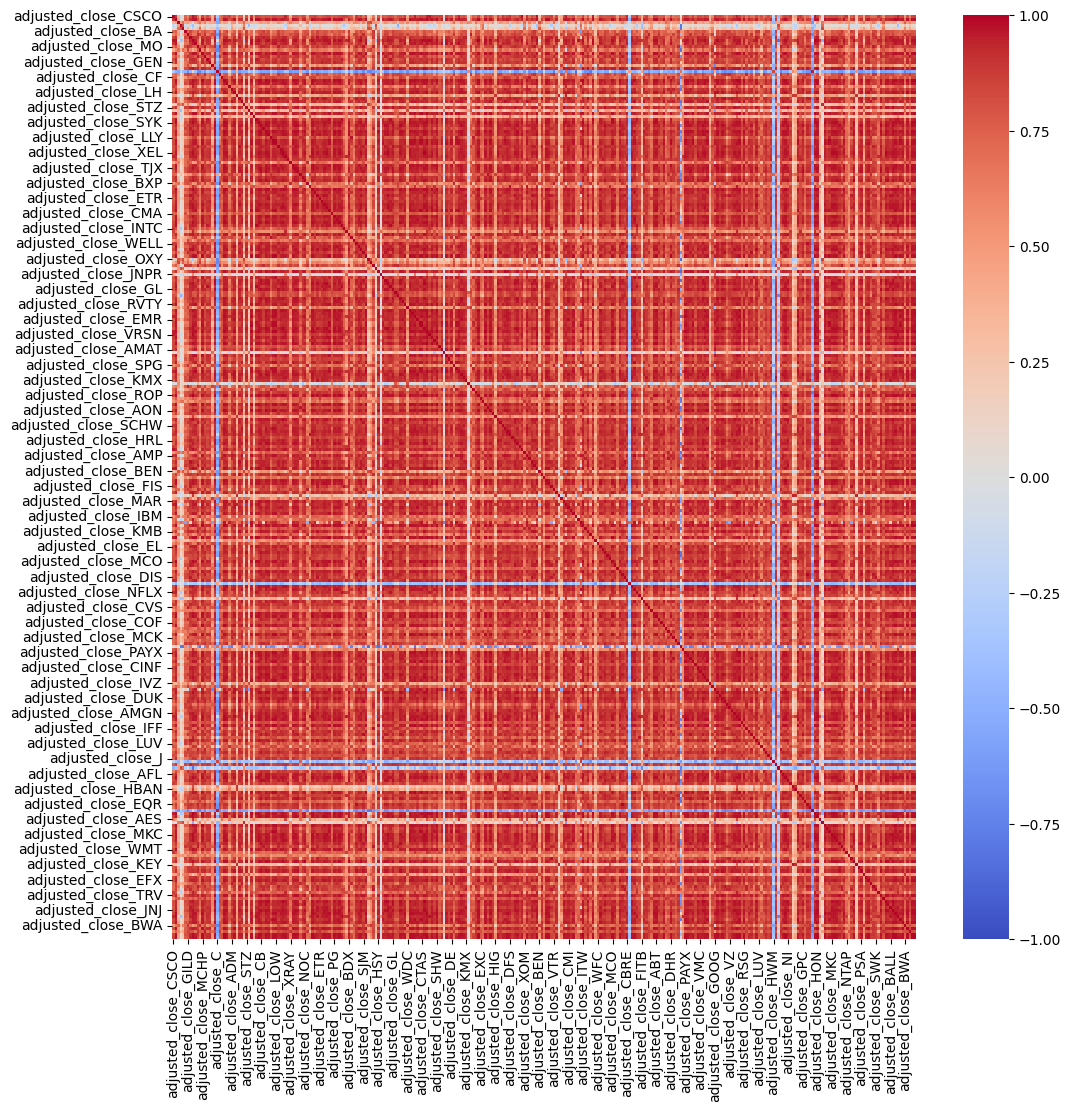

In [118]:
corr_heatmap(adjusted_close_df)

In [126]:
import pandas as pd

# Assuming ROOT and adjusted_close_df are defined earlier in your code

# Load and sort the SP500 symbol information
spy_symbols_info_df = pd.read_csv(ROOT + '/series/additional_data/SP500_symbol_info.csv')
spy_symbols_info_df = spy_symbols_info_df.sort_values('Symbol')

print(temp_df.head())

# Extract unique industries
industries = set(spy_symbols_info_df['GICS Sector'])

# Process each industry
for industry in industries:
    # Find the symbols in this industry
    industry_symbols = spy_symbols_info_df[spy_symbols_info_df['GICS Sector'] == industry]['Symbol']

    # Columns to keep (intersection of symbols in industry and columns in temp_df)
    columns_to_keep = [f'adjusted_close_{symbol}' for symbol in industry_symbols if f'adjusted_close_{symbol}' in adjusted_close_df.columns]

    # Create a dataframe for this industry using loc to keep the index
    industry_df = adjusted_close_df.loc[:, columns_to_keep]

    # Save this dataframe to CSV
    industry_df.to_csv(f'{ROOT}/series/adjusted_close_per_industry/{industry}_adjusted_close.csv', index=True)


                 CSCO    ISRG    TPR    DVN    MRO      BA   GILD    MDT  \
timestamp                                                                  
2023-10-06  53.450000  295.68  28.19  43.70  24.59  187.38  74.74  76.12   
2023-10-05  53.070000  290.09  27.58  42.85  24.24  186.29  74.70  76.15   
2023-10-04  53.450000  290.28  27.84  43.35  24.40  186.73  74.74  76.27   
2023-10-03  53.650000  288.04  27.95  45.75  25.68  188.92  73.27  76.54   
2023-10-02  53.997474  294.98  28.58  45.65  25.59  187.83  74.10  77.77   

                 V       A  ...     JNJ     DOV     CRM         PGR     WAT  \
timestamp                   ...                                               
2023-10-06  235.04  110.64  ...  157.64  138.89  207.36  142.860000  267.40   
2023-10-05  233.48  110.35  ...  157.14  138.31  202.01  142.500000  265.99   
2023-10-04  231.22  111.67  ...  155.52  137.92  201.87  142.160000  267.76   
2023-10-03  228.81  110.26  ...  155.34  137.78  199.83  139.302010  265